In [2]:
from sklearn.cluster import SpectralClustering, DBSCAN, AffinityPropagation
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sn

from CalcScore import Calculator
from CGmodel import CGCalculator

contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171] #MHCpan
contactA = [5,7,9,24,25,34,45,59,63,66,67,70,74,77,80,81,84,97,99,113,114,116,123,133,143,146,147,152,155,156,159,160,163,167,171]
contactB = [5,7,8,9,24,45,59,62,63,65,66,67,70,73,74,76,77,80,81,84,95,97,99,114,116,123,143,146,147,152,155,156,159,160,163,167,171]

weight = {3:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]}

## --- Full-Atom methods ---

In [3]:
def CalcMat(DATDir, OutCSV, contact, weight):
    # l: charge param
    # s: spatial param
    # d: depth param
    calc = Calculator(DATDir, OutCSV, ContactResi=contact, ResiWeight=weight)
    # calc.l = l
    # calc.sigma = s
    # calc.d = d
    calc.CalcDist()

    return calc.DistMat

def heatmap(Mat, order=None, size=(10,10)):
    # Mat = pd.read_csv(InCSV, index_col=0)
    Mat = Mat.add(Mat.T, fill_value=0)
    # print(Mat.index)
    if order:
        split = np.cumsum([len(sublist) for sublist in order])
        # print(split)
        flat_order = [item for sublist in order for item in sublist]
        Mat = Mat[flat_order]
        Mat = Mat.reindex(flat_order)
    # print(Mat.index, Mat.columns)

    plt.figure(figsize=size, facecolor="w")
    
    sn.heatmap(Mat, square=True, xticklabels=True, yticklabels=True)
    for line in split[:-1]:
        plt.axhline(y=line, color='y', linestyle='-')
        plt.axvline(x=line, color='y', linestyle='-')
    plt.show()
    return

In [4]:
def DBSCAN_cluster(InCSV):
    Mat = pd.read_csv(InCSV, index_col=0)
    Mat = Mat.add(Mat.T, fill_value=0)
    clustering = DBSCAN(eps=9, min_samples=2, metric="precomputed").fit(Mat)
    print(clustering.labels_)

    return

def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

def dendro(Mat, OutTreeFile):
    # Mat = pd.read_csv(InCSV, index_col=0)
    Mat = Mat.add(Mat.T, fill_value=0)
    dists = squareform(Mat)
    # print(dists)
    A = linkage(dists, "single")
    # print(A)
    tree = to_tree(A,False)
    OutFile = getNewick(tree, "", tree.dist, Mat.index)
    with open(OutTreeFile, "w") as fh:
        fh.write(OutFile)
    # dendrogram(A, labels=Mat.index)
    # plt.title("HLAA")
    # plt.rcParams['axes.labelsize'] = 4
    # plt.show()
    return

### mean crystal sturctures

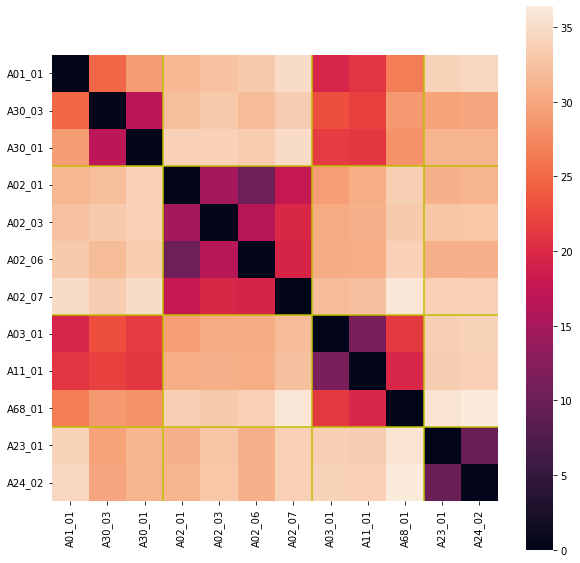

In [5]:
# crystal structure
A_crystal_mean_order = [['A01_01', 'A30_03', 'A30_01'],
    ['A02_01', 'A02_03', 'A02_06', 'A02_07'],
    ['A03_01', 'A11_01', 'A68_01'],
    ['A23_01', 'A24_02']]

Mat = CalcMat("../crystal/A_mean/DAT", "../crystal/A_mean/HLA-A_mean.csv", contact=contact, weight=weight)
heatmap(Mat, A_crystal_mean_order)
# dendro(Mat, "A_cr_mean.newick")


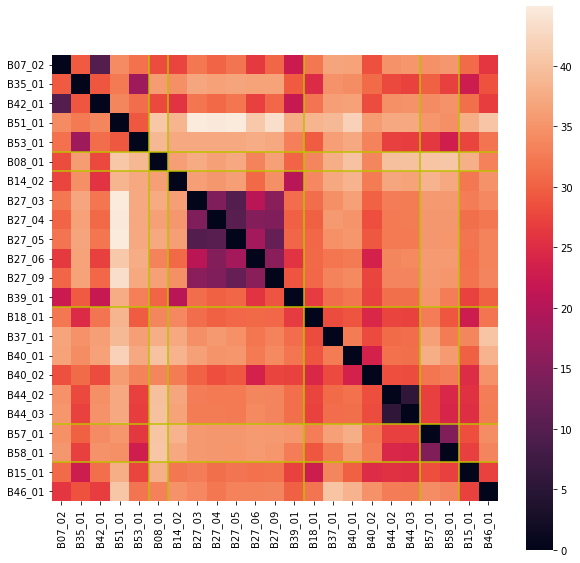

In [6]:
B_crystal_mean_order = [["B07_02","B35_01","B42_01","B51_01","B53_01"],
    ["B08_01"],
    ["B14_02","B27_03","B27_04","B27_05","B27_06","B27_09","B39_01"],
    ["B18_01","B37_01","B40_01","B40_02","B44_02","B44_03"],
    ["B57_01","B58_01"],
    ["B15_01","B46_01"]]

Mat = CalcMat("../crystal/B_mean/DAT", "../crystal/B_mean/HLA-B_mean.csv", contact=contact, weight=weight)
heatmap(Mat, B_crystal_mean_order)
# dendro(Mat, "B_cr_mean.newick")

### relaxed homology models of HLA-A

In [8]:
# relaxed HLA-A

A_order = [['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']]

Mat = CalcMat("../HLAA_relax/DAT", "../HLAA_relax/HLA-A_relax.csv", contact=contact, weight=weight)
heatmap(Mat, A_order)
# dendro(Mat, "A_ref_relax.newick")

KeyError: 'Hydrophobicity'

### non-relaxed homology models of HLA-A

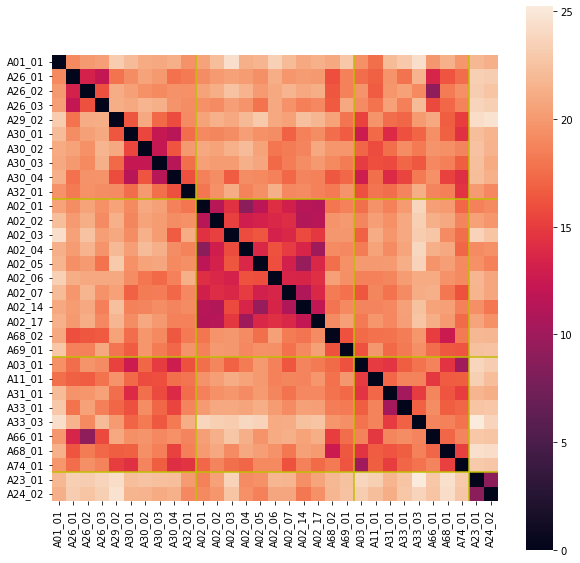

In [ ]:
A_order = [['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']]

Mat = CalcMat("../HLAA_reference_panel/DAT", "../HLAA_reference_panel/HLA-A_ref.csv", depth_cut=0, contact=contact, weight=None)
heatmap(Mat, A_order)
# dendro(Mat, "A_ref.newick")

### relaxed homology models of HLA-B

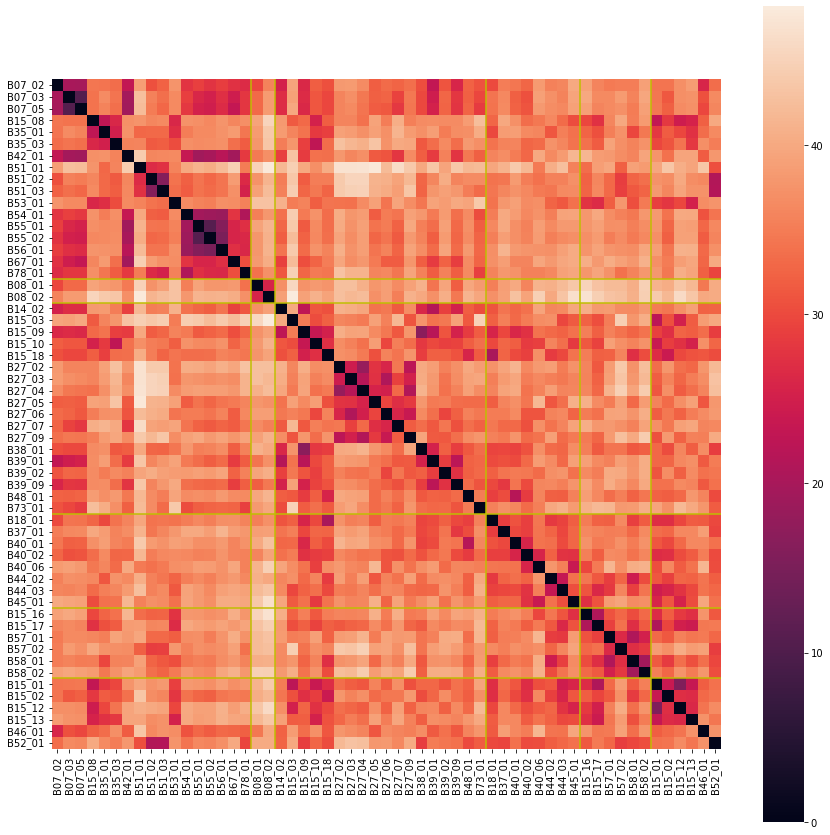

In [ ]:
# relaxed HLA-B

B_order = [['B07_02', 'B07_03', 'B07_05', 'B15_08', 'B35_01', 'B35_03', 'B42_01', 'B51_01', 'B51_02', 'B51_03', 'B53_01', 'B54_01', 'B55_01', 'B55_02', 'B56_01', 'B67_01', 'B78_01'],
 ['B08_01', 'B08_02'],
 ['B14_02', 'B15_03', 'B15_09', 'B15_10', 'B15_18', 'B27_02', 'B27_03', 'B27_04', 'B27_05', 'B27_06', 'B27_07', 'B27_09', 'B38_01', 'B39_01', 'B39_02', 'B39_09', 'B48_01', 'B73_01'],
 ['B18_01', 'B37_01', 'B40_01', 'B40_02', 'B40_06', 'B44_02', 'B44_03', 'B45_01'],
 ['B15_16', 'B15_17', 'B57_01', 'B57_02', 'B58_01', 'B58_02'],
 ['B15_01', 'B15_02', 'B15_12', 'B15_13', 'B46_01', 'B52_01']]
# heatmap("HLABref_distance_scd.csv", B_order)

Mat = CalcMat("../HLAB_relax/DAT", "../HLAB_relax/HLA-B_relax.csv", depth_cut=0, contact=contact, weight=weight)
heatmap(Mat, B_order, size=(15,15))
# dendro(Mat, "B_ref_relax.newick")

### non-relaxed homology models of HLA-B

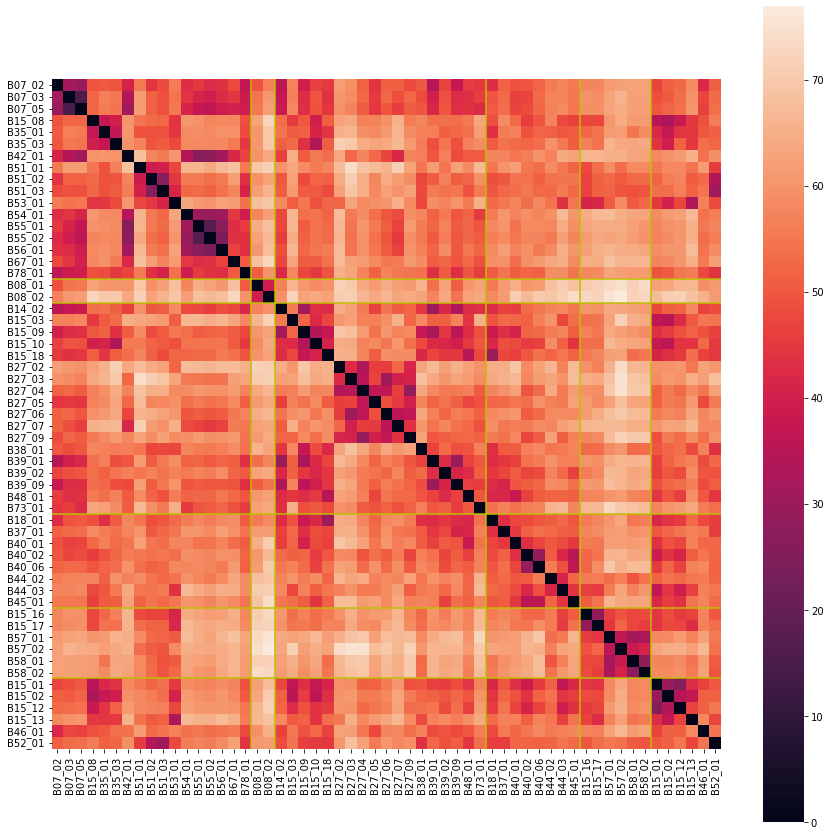

In [ ]:
B_order = [['B07_02', 'B07_03', 'B07_05', 'B15_08', 'B35_01', 'B35_03', 'B42_01', 'B51_01', 'B51_02', 'B51_03', 'B53_01', 'B54_01', 'B55_01', 'B55_02', 'B56_01', 'B67_01', 'B78_01'],
 ['B08_01', 'B08_02'],
 ['B14_02', 'B15_03', 'B15_09', 'B15_10', 'B15_18', 'B27_02', 'B27_03', 'B27_04', 'B27_05', 'B27_06', 'B27_07', 'B27_09', 'B38_01', 'B39_01', 'B39_02', 'B39_09', 'B48_01', 'B73_01'],
 ['B18_01', 'B37_01', 'B40_01', 'B40_02', 'B40_06', 'B44_02', 'B44_03', 'B45_01'],
 ['B15_16', 'B15_17', 'B57_01', 'B57_02', 'B58_01', 'B58_02'],
 ['B15_01', 'B15_02', 'B15_12', 'B15_13', 'B46_01', 'B52_01']]
# heatmap("HLABref_distance_scd.csv", B_order)

Mat = CalcMat("../HLAB_reference_panel/DAT", "../HLAB_reference_panel/HLA-B_ref.csv", depth_cut=0, contact=contact, weight=weight)
heatmap(Mat, B_order, size=(15,15))
# dendro(Mat, "B_ref.newick")

## --- Coarse-grained methods ---

In [4]:
def CGCalcMat(DATDir, OutCSV, contact, weight):

    calc = CGCalculator(DATDir, OutCSV, ContactResi=contact, ResiWeight=weight)

    calc.CalcDist()

    return calc.DistMat

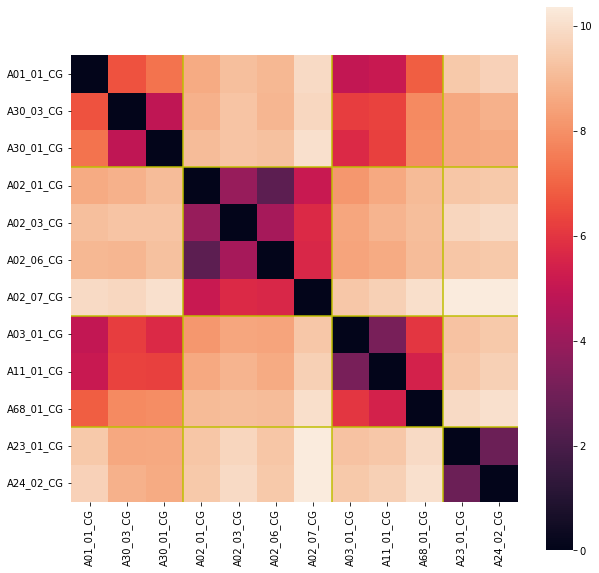

In [5]:
# crystal structure
A_crystal_mean_order = [['A01_01_CG', 'A30_03_CG', 'A30_01_CG'],
    ['A02_01_CG', 'A02_03_CG', 'A02_06_CG', 'A02_07_CG'],
    ['A03_01_CG', 'A11_01_CG', 'A68_01_CG'],
    ['A23_01_CG', 'A24_02_CG']]

Mat = CGCalcMat("../crystal/A_mean/CG", "../crystal/A_mean/HLA-A_mean_CG.csv", contact=contact, weight=weight)
heatmap(Mat, A_crystal_mean_order)
# dendro(Mat, "A_cr_CG.newick")

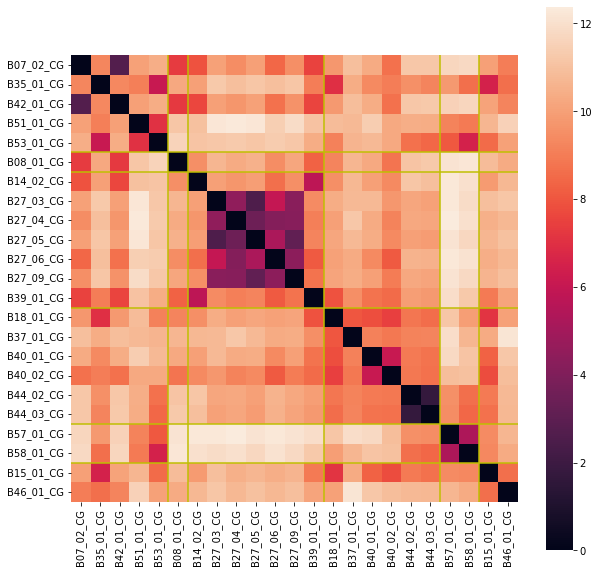

In [6]:
B_crystal_mean_order = [["B07_02_CG","B35_01_CG","B42_01_CG","B51_01_CG","B53_01_CG"],
    ["B08_01_CG"],
    ["B14_02_CG","B27_03_CG","B27_04_CG","B27_05_CG","B27_06_CG","B27_09_CG","B39_01_CG"],
    ["B18_01_CG","B37_01_CG","B40_01_CG","B40_02_CG","B44_02_CG","B44_03_CG"],
    ["B57_01_CG","B58_01_CG"],
    ["B15_01_CG","B46_01_CG"]]

Mat = CGCalcMat("../crystal/B_mean/CG", "../crystal/A_mean/HLA-B_mean_CG.csv", contact=contact, weight=weight)
heatmap(Mat, B_crystal_mean_order)
dendro(Mat, "B_cr_CG.newick")

### CG method for relaxed homology models

In [ ]:
A_order = [['A01_01_CG', 'A26_01_CG', 'A26_02_CG', 'A26_03_CG', 'A29_02_CG', 'A30_01_CG', 'A30_02_CG', 'A30_03_CG', 'A30_04_CG', 'A32_01_CG'],
    ['A02_01_CG', 'A02_02_CG', 'A02_03_CG', 'A02_04_CG', 'A02_05_CG', 'A02_06_CG', 'A02_07_CG', 'A02_14_CG', 'A02_17_CG', 'A68_02_CG', 'A69_01_CG'],
    ['A03_01_CG', 'A11_01_CG', 'A31_01_CG', 'A33_01_CG', 'A33_03_CG', 'A66_01_CG', 'A68_01_CG', 'A74_01_CG'],
    ['A23_01_CG', 'A24_02_CG']]

Mat = CalcMat("../HLAA_relax/DAT", "../HLAA_relax/HLA-A_relax.csv", depth_cut=0, contact=contact, weight=weight)
heatmap(Mat, A_order)
# dendro(Mat, "A_ref_relax.newick")

In [ ]:
# relaxed HLA-B

B_order = [['B07_02_CG', 'B07_03_CG', 'B07_05_CG', 'B15_08_CG', 'B35_01_CG', 'B35_03_CG', 'B42_01_CG', 'B51_01_CG', 'B51_02_CG', 'B51_03_CG', 'B53_01_CG', 'B54_01_CG', 'B55_01_CG', 'B55_02_CG', 'B56_01_CG', 'B67_01_CG', 'B78_01_CG'],
    ['B08_01_CG', 'B08_02_CG'],
    ['B14_02_CG', 'B15_03_CG', 'B15_09_CG', 'B15_10_CG', 'B15_18_CG', 'B27_02_CG', 'B27_03_CG', 'B27_04_CG', 'B27_05_CG', 'B27_06_CG', 'B27_07_CG', 'B27_09_CG', 'B38_01_CG', 'B39_01_CG', 'B39_02_CG', 'B39_09_CG', 'B48_01_CG', 'B73_01_CG'],
    ['B18_01_CG', 'B37_01_CG', 'B40_01_CG', 'B40_02_CG', 'B40_06_CG', 'B44_02_CG', 'B44_03_CG', 'B45_01_CG'],
    ['B15_16_CG', 'B15_17_CG', 'B57_01_CG', 'B57_02_CG', 'B58_01_CG', 'B58_02_CG'],
    ['B15_01_CG', 'B15_02_CG', 'B15_12_CG', 'B15_13_CG', 'B46_01_CG', 'B52_01_CG']]
# heatmap("HLABref_distance_scd.csv", B_order)

Mat = CalcMat("../HLAB_relax/DAT", "../HLAB_relax/HLA-B_relax.csv", depth_cut=0, contact=contact, weight=weight)
heatmap(Mat, B_order, size=(15,15))
# dendro(Mat, "B_ref_relax.newick")

In [26]:
'''
Mat = pd.read_csv("Rosetta_pipeline/HLA-B.csv")
Mat.set_index('Allele', inplace=True)
# print(Mat)
A_temp = ['A*01:01','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:02','A*30:03','A*30:04','A*32:01','A*02:01','A*02:02','A*02:03','A*02:04','A*02:05','A*02:06','A*02:07','A*02:14','A*02:17','A*68:02','A*69:01','A*03:01','A*11:01','A*31:01','A*33:01','A*33:03','A*66:01','A*68:01','A*74:01','A*23:01','A*24:02']
B_temp = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']
# print(Mat[['Allele', 'Best_template']])
Mat.query("Allele in @B_temp")
# Mat_s = Mat_s.reindex(A_temp)
# print(Mat_s)
'''

'\nMat = pd.read_csv("Rosetta_pipeline/HLA-B.csv")\nMat.set_index(\'Allele\', inplace=True)\n# print(Mat)\nA_temp = [\'A*01:01\',\'A*26:01\',\'A*26:02\',\'A*26:03\',\'A*29:02\',\'A*30:01\',\'A*30:02\',\'A*30:03\',\'A*30:04\',\'A*32:01\',\'A*02:01\',\'A*02:02\',\'A*02:03\',\'A*02:04\',\'A*02:05\',\'A*02:06\',\'A*02:07\',\'A*02:14\',\'A*02:17\',\'A*68:02\',\'A*69:01\',\'A*03:01\',\'A*11:01\',\'A*31:01\',\'A*33:01\',\'A*33:03\',\'A*66:01\',\'A*68:01\',\'A*74:01\',\'A*23:01\',\'A*24:02\']\nB_temp = [\'B*07:02\',\'B*07:03\',\'B*07:05\',\'B*15:08\',\'B*35:01\',\'B*35:03\',\'B*42:01\',\'B*51:01\',\'B*51:02\',\'B*51:03\',\'B*53:01\',\'B*54:01\',\'B*55:01\',\'B*55:02\',\'B*56:01\',\'B*67:01\',\'B*78:01\',\'B*08:01\',\'B*08:02\',\'B*14:02\',\'B*15:03\',\'B*15:09\',\'B*15:10\',\'B*15:18\',\'B*27:02\',\'B*27:03\',\'B*27:04\',\'B*27:05\',\'B*27:06\',\'B*27:07\',\'B*27:09\',\'B*38:01\',\'B*39:01\',\'B*39:02\',\'B*39:09\',\'B*48:01\',\'B*73:01\',\'B*18:01\',\'B*37:01\',\'B*40:01\',\'B*40:02\',\'B*40: